# Web Scraping and Sentiment Analysis

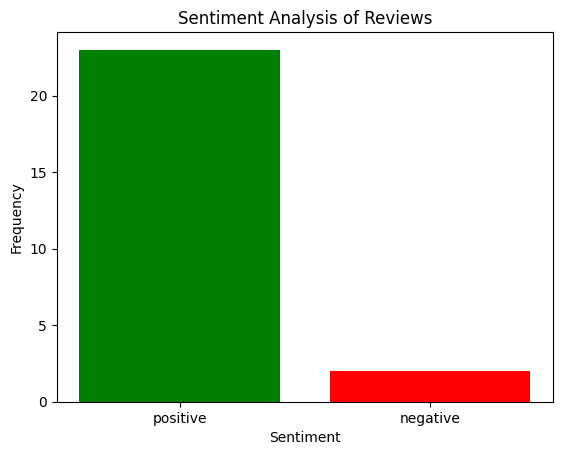

Sentiment analysis concluded. Visualization displayed.


In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.imdb.com/title/tt2380307/reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
reviews_container = soup.find('div', class_='lister-list')
reviews = reviews_container.find_all('div', class_='text show-more__control')
reviews = [review.text.strip() for review in reviews]

review_data = {'Review': reviews}
review_df = pd.DataFrame(review_data)
review_df.to_csv('movie_reviews2.csv', index=False)

sentiments = []
polarities = []
for review in reviews:
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity
    polarities.append(sentiment_score)
    if sentiment_score > 0:
        sentiments.append('positive')
    elif sentiment_score < 0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

sentiment_counts = pd.Series(sentiments).value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews')
plt.show()

print("Sentiment analysis concluded. Visualization displayed.")


# Sentiment Analysis with proper steps:

# Web Scraping / Text extraction, Text Cleaning

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')


url = 'https://www.imdb.com/title/tt2380307/reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
reviews_container = soup.find('div', class_='lister-list')
reviews = reviews_container.find_all('div', class_='text show-more__control')
reviews = [review.text.strip() for review in reviews]

review_data = {'Review': reviews}
review_df = pd.DataFrame(review_data)
review_df.to_csv('movie_reviews2.csv', index=False)

df = pd.read_csv('/content/movie_reviews2.csv')
print("Original dataset:")
print(df.head())

def clean_text(text):
    # Removing mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

df['cleaned_text'] = df['Review'].apply(clean_text)

print("\nCleaned dataset:")
print(df[['Review', 'cleaned_text']].head())





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original dataset:
                                              Review
0  Music is banned in Miguel's household after hi...
1  I am very glad I saw "Coco" and understand exa...
2  I knew absolutely nothing about this movie wal...
3  I'm not an animated movie fan per se, so this ...
4  There are no shortcomings in the picture, conn...

Cleaned dataset:
                                              Review  \
0  Music is banned in Miguel's household after hi...   
1  I am very glad I saw "Coco" and understand exa...   
2  I knew absolutely nothing about this movie wal...   
3  I'm not an animated movie fan per se, so this ...   
4  There are no shortcomings in the picture, conn...   

                                        cleaned_text  
0  music banned miguels household musical greatgr...  
1  glad saw coco understand exactly oscar best an...  
2  knew absolutely nothing movie walking reason t...  
3  im animated movie fan per se one caught right ...  
4  shortcomings picture connotatio

# Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

for cleaned_texts in df['cleaned_text']:
    print(f"Cleaned text: {cleaned_texts}")
    stemmed_tokens = word_tokenize(cleaned_texts)
    # Stemming
    stemmed_tokens = stem_text(stemmed_tokens)
    print(f"Stemmed tokens: {stemmed_tokens}")
    print()


Cleaned text: music banned miguels household musical greatgrandfather abandoned greatgrandmother young daughter mexicos day dead festival convoluted series events sees miguel transported land dead discovers dead disappear noone remembers also discovers unless returns land living dawn join dead problems aheadthe story artificially structured sorts bits pieces present predetermined trail events created never notice natural narrative flow film highly original full truly gorgeous visuals lovely songs delightful characters touching resolutions several individual story threads yet appeared uk publicity trailers warnings whatsoever local multiscreen didnt even get despite fact clear would dazzlingthis good pixar film last several years better
Stemmed tokens: ['music', 'ban', 'miguel', 'household', 'music', 'greatgrandfath', 'abandon', 'greatgrandmoth', 'young', 'daughter', 'mexico', 'day', 'dead', 'festiv', 'convolut', 'seri', 'event', 'see', 'miguel', 'transport', 'land', 'dead', 'discov', '

# Top Frequent Terms & Document Matrix

Document-Term Matrix:
                                                    abandoned  absolute  \
Review                                                                    
Music is banned in Miguel's household after his...          1         0   
I am very glad I saw "Coco" and understand exac...          0         0   
I knew absolutely nothing about this movie walk...          0         0   
I'm not an animated movie fan per se, so this o...          0         0   
There are no shortcomings in the picture, conno...          0         0   
"Coco" is the best animated film from Pixar and...          0         0   
I have always been a fan of Pixar. They are rea...          0         0   
I may be biased, since this movie portrayed per...          0         0   
Everything about this movie is wonderful. The c...          0         0   
Coco tells the story of young boy named Miguel ...          0         0   
Pixar has done it AGAIN! 'Coco' is a yet anothe...          0         0   
I'm

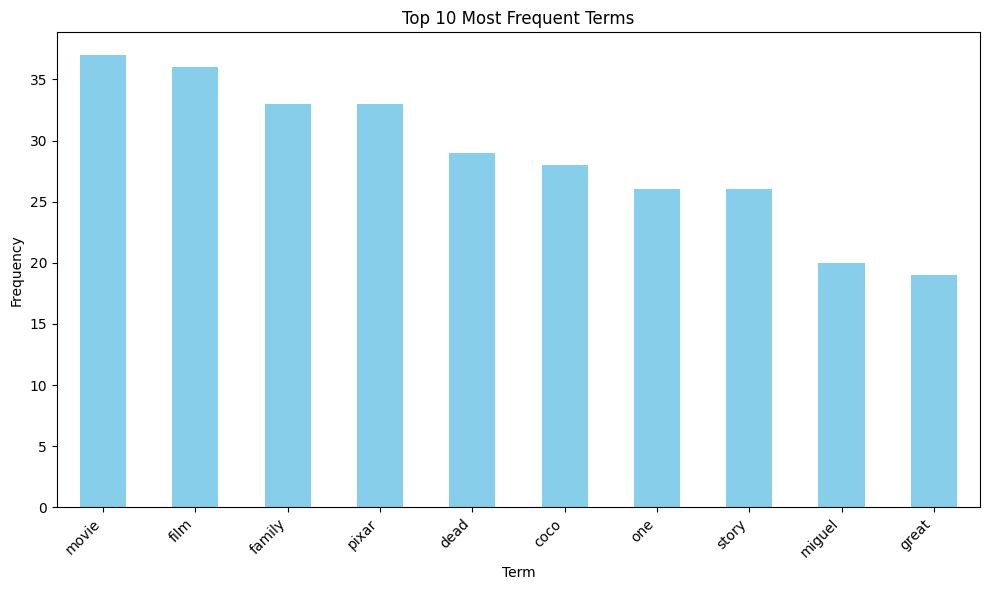

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

cleaned_texts = df['cleaned_text']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_texts)

terms = vectorizer.get_feature_names_out()

df_counts = pd.DataFrame(X.toarray(), columns=terms, index=df['Review'])

term_frequencies = df_counts.sum(axis=0)

N = 10
top_terms = term_frequencies.nlargest(N)


print("Document-Term Matrix:")
print(df_counts)
print()

term_frequencies = df_counts.sum(axis=0)

N = 10
top_terms = term_frequencies.nlargest(N)

plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Word Cloud

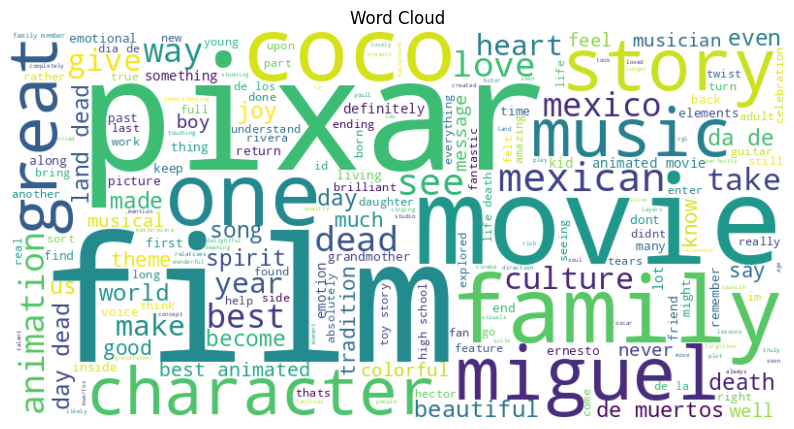

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_Texts = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_Texts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# Association

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

terms = vectorizer.get_feature_names_out()

df_counts = pd.DataFrame(X.toarray(), columns=terms, index=df['Review'])

target_word = 'film'
associations = df_counts[df_counts[target_word] > 0].drop(target_word, axis=1).sum(axis=0)

# Sorting the associations by frequency
associations = associations.sort_values(ascending=False)

print(f"Associations for the word '{target_word}':")
print(associations)


Associations for the word 'film':
dead            24
pixar           19
coco            19
family          18
one             18
                ..
shoulder         0
cried            0
shortcomings     0
crises           0
youre            0
Length: 1292, dtype: int64


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Using vader_lexicon

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentiments = []
for text in df['cleaned_text']:
    sentiment_score = sia.polarity_scores(text)
    sentiments.append(sentiment_score)

df['sentiment_scores'] = sentiments

for i, sentiment in enumerate(df['sentiment_scores'], 1):
    print(f"Text {i}: {sentiment}")


Text 1: {'neg': 0.247, 'neu': 0.533, 'pos': 0.22, 'compound': -0.5772}
Text 2: {'neg': 0.14, 'neu': 0.609, 'pos': 0.251, 'compound': 0.9313}
Text 3: {'neg': 0.037, 'neu': 0.759, 'pos': 0.205, 'compound': 0.8777}
Text 4: {'neg': 0.08, 'neu': 0.629, 'pos': 0.291, 'compound': 0.9884}
Text 5: {'neg': 0.224, 'neu': 0.579, 'pos': 0.197, 'compound': -0.1759}
Text 6: {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.9905}
Text 7: {'neg': 0.062, 'neu': 0.53, 'pos': 0.408, 'compound': 0.9985}
Text 8: {'neg': 0.09, 'neu': 0.655, 'pos': 0.255, 'compound': 0.9666}
Text 9: {'neg': 0.083, 'neu': 0.414, 'pos': 0.503, 'compound': 0.9348}
Text 10: {'neg': 0.067, 'neu': 0.603, 'pos': 0.329, 'compound': 0.9965}
Text 11: {'neg': 0.178, 'neu': 0.579, 'pos': 0.244, 'compound': 0.9122}
Text 12: {'neg': 0.137, 'neu': 0.407, 'pos': 0.456, 'compound': 0.9865}
Text 13: {'neg': 0.155, 'neu': 0.578, 'pos': 0.267, 'compound': 0.984}
Text 14: {'neg': 0.107, 'neu': 0.692, 'pos': 0.201, 'compound': 0.9423}
Text 15

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Visualization

<ipython-input-9-e523c9c4d36f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=compound_scores, palette='viridis')


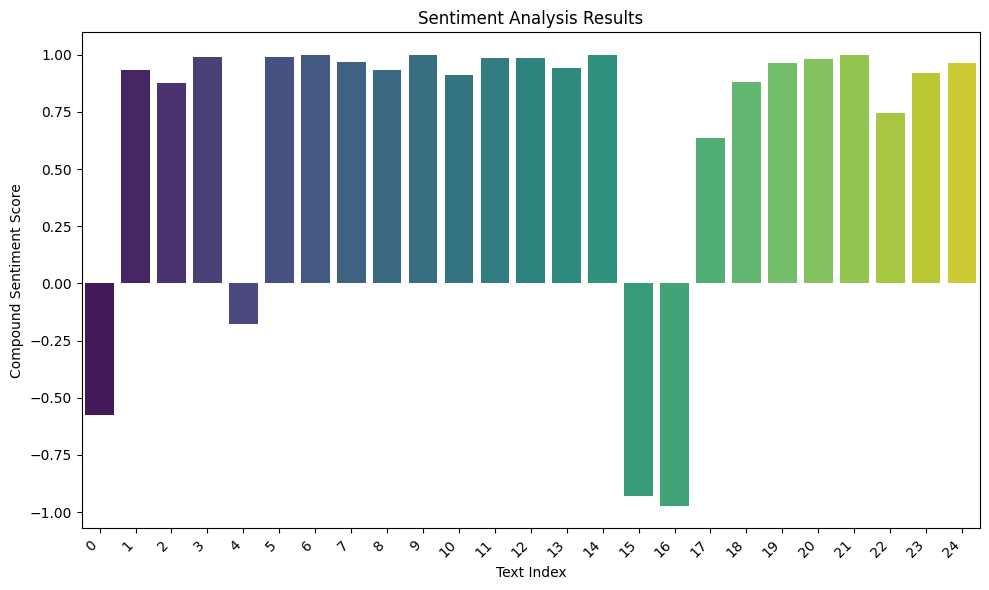

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract compound sentiment scores from the DataFrame
compound_scores = df['sentiment_scores'].apply(lambda x: x['compound'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=compound_scores, palette='viridis')
plt.title('Sentiment Analysis Results')
plt.xlabel('Text Index')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Task#1: MalwareDataSeperated

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Pre-processing
malware_data = pd.read_csv('MalwareDataseperated.csv')

# Check for missing values
missing_values = malware_data.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit           

In [ ]:
malware_data.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'LoadConfigurationSize', 'legitimate'],
      dtype='object')

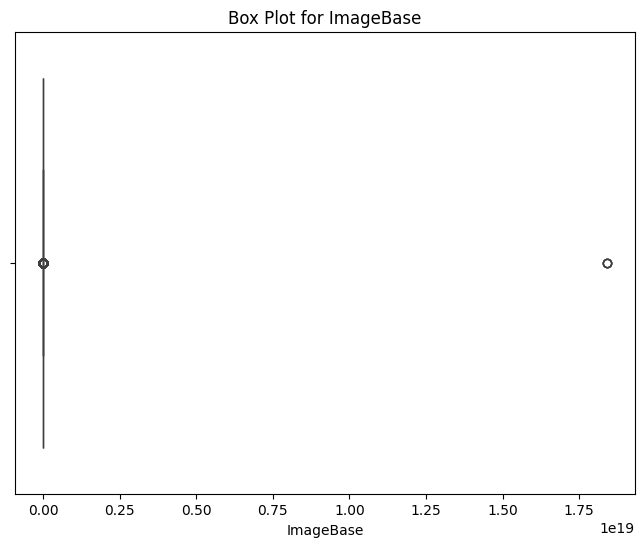

Outliers in 'Characteristics' feature:
                                               Name  \
136                                       Skype.exe   
15936                                  unins000.exe   
15980                                  unins000.exe   
16002                                  unins000.exe   
16101                                  unins000.exe   
...                                             ...   
138007  VirusShare_8e345e6cb7e46238bebebc227a922645   
138014  VirusShare_eb8d16e34388e6d2096a9d88392aad85   
138041  VirusShare_78de357e6e7bbfd27eb050858c1d07d1   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   

                                     md5  Machine  SizeOfOptionalHeader  \
136     5cbc122dd419711cae36d8ef88a5bc09      332                   224   
15936   5225f41aeec7f2ee6ae3873147dd5792      332                   224   
15980   3f1c2b62a6ce3c7a647edb50ed11a43d      332                   224   


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=malware_data['ImageBase'])
plt.title('Box Plot for ImageBase')
plt.show()

# Outliers
Q1 = malware_data['Characteristics'].quantile(0.25)
Q3 = malware_data['Characteristics'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = malware_data[(malware_data['Characteristics'] < lower_bound) | (malware_data['Characteristics'] > upper_bound)]
print("Outliers in 'Characteristics' feature:")
print(outliers)



# Step 7: Interpretation and Conclusion
# Based on the analysis, we observed the distribution of features, checked for outliers, and dropped an irrelevant feature.
# The box plot for 'ImageBase' shows the spread of values and identifies potential outliers.
# The outliers in the 'Characteristics' feature suggest that some values deviate significantly from the majority.
# Further analysis or domain knowledge may be needed to understand the significance of these outliers.

# Again

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

malware_data = pd.read_csv('/content/MalwareDataseperated.csv')

# Data Pre-Processing
# Checking for missing values
missing_values = malware_data.isnull().sum()
print("Missing Values:")
print(missing_values)

malware_data.dropna(inplace=True)

scaler = StandardScaler()
numerical_features = malware_data.select_dtypes(include=['int64', 'float64']).columns
malware_data[numerical_features] = scaler.fit_transform(malware_data[numerical_features])

print("Pre-processed Dataset:")
print(malware_data.head())


Missing Values:
Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit           

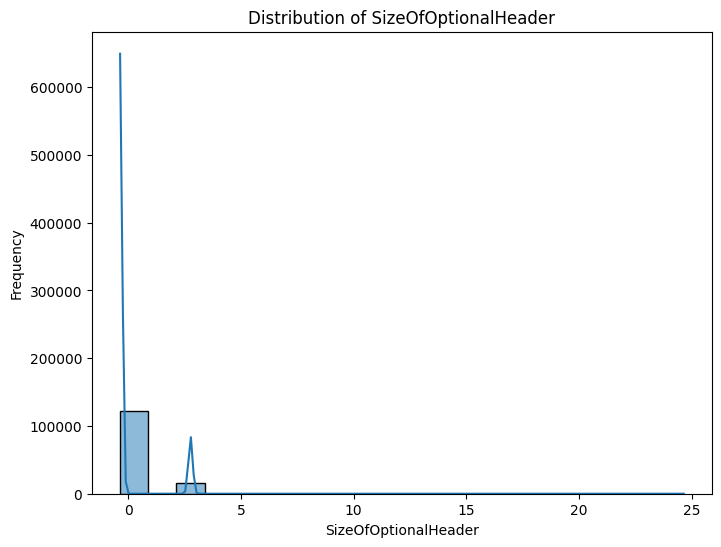

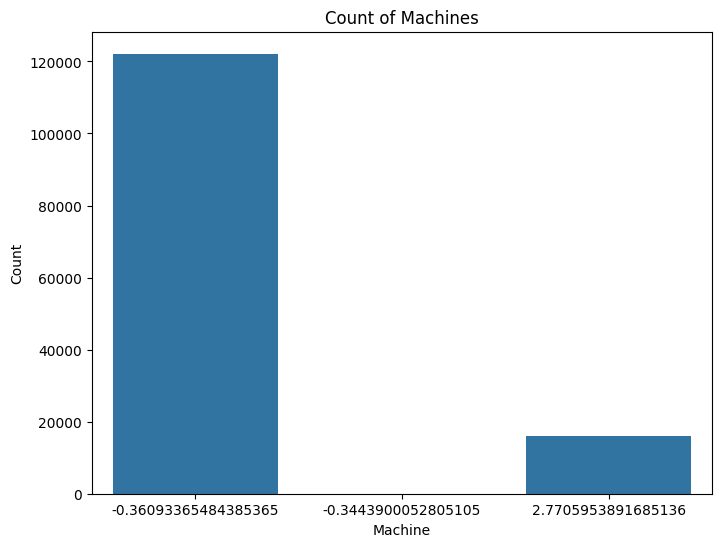

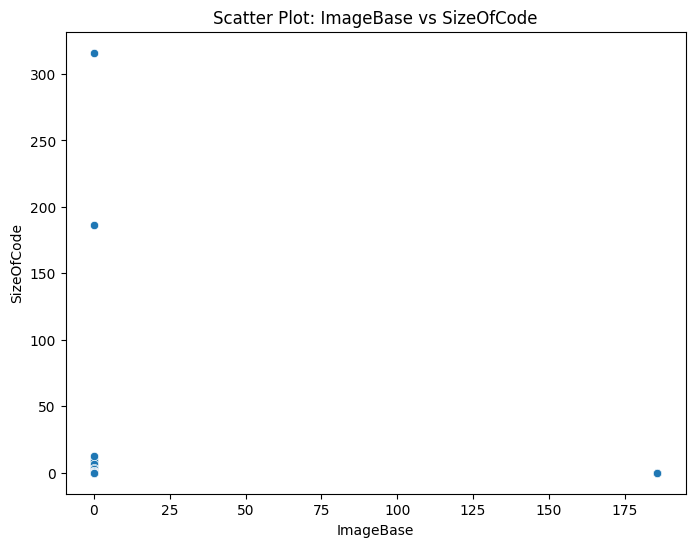

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram for a Numeric Feature
plt.figure(figsize=(8, 6))
sns.histplot(data=malware_data, x='SizeOfOptionalHeader', bins=20, kde=True)
plt.title('Distribution of SizeOfOptionalHeader')
plt.xlabel('SizeOfOptionalHeader')
plt.ylabel('Frequency')
plt.show()

# For a Categorical Feature
plt.figure(figsize=(8, 6))
sns.countplot(data=malware_data, x='Machine')
plt.title('Count of Machines')
plt.xlabel('Machine')
plt.ylabel('Count')
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=malware_data, x='ImageBase', y='SizeOfCode')
plt.title('Scatter Plot: ImageBase vs SizeOfCode')
plt.xlabel('ImageBase')
plt.ylabel('SizeOfCode')
plt.show()


Dropped 'SectionsNb' feature.


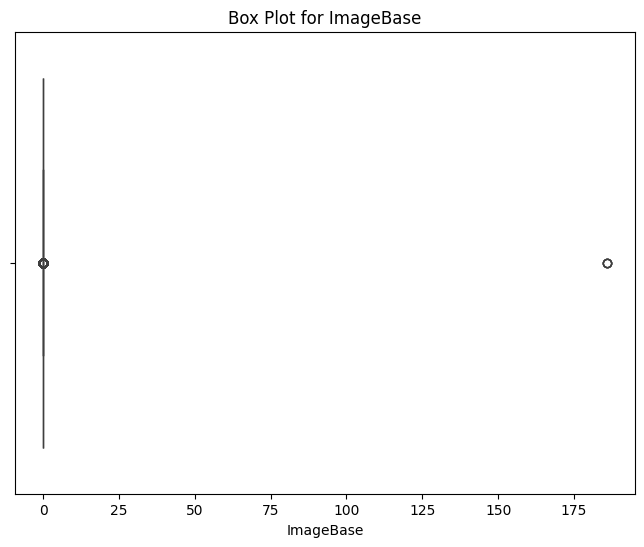

Outliers in 'Characteristics' feature:
                                               Name  \
136                                       Skype.exe   
15936                                  unins000.exe   
15980                                  unins000.exe   
16002                                  unins000.exe   
16101                                  unins000.exe   
...                                             ...   
138007  VirusShare_8e345e6cb7e46238bebebc227a922645   
138014  VirusShare_eb8d16e34388e6d2096a9d88392aad85   
138041  VirusShare_78de357e6e7bbfd27eb050858c1d07d1   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   

                                     md5   Machine  SizeOfOptionalHeader  \
136     5cbc122dd419711cae36d8ef88a5bc09 -0.360934             -0.360378   
15936   5225f41aeec7f2ee6ae3873147dd5792 -0.360934             -0.360378   
15980   3f1c2b62a6ce3c7a647edb50ed11a43d -0.360934             -0.360378

In [ ]:
# If any feature needs to be dropped, drop else justify
malware_data.drop('SectionsNb', axis=1, inplace=True)
print("Dropped 'SectionsNb' feature.")

# Box Plot for the feature 'ImageBase'
plt.figure(figsize=(8, 6))
sns.boxplot(data=malware_data, x='ImageBase')
plt.title('Box Plot for ImageBase')
plt.xlabel('ImageBase')
plt.show()

# outliers
Q1 = malware_data['Characteristics'].quantile(0.25)
Q3 = malware_data['Characteristics'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = malware_data[(malware_data['Characteristics'] < lower_bound) | (malware_data['Characteristics'] > upper_bound)]
print("Outliers in 'Characteristics' feature:")
print(outliers)
